In [47]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [299]:
class Line:
    def __init__(self,origin=0,angle=5):
        self.origin = origin;
        self.angle = angle;
    def get(self,arr):
        y = np.tan(self.angle)*(np.array(arr)-self.origin)
        x = np.array(arr);
        return np.array([x,y])
        
class Laser_Scanner:
    def __init__(self, num_beams, angle, focal_point):
        #assume odd
        self.n = num_beams;
        self.angle = angle*np.pi/180;
        self.focal_point = focal_point;
        self.lines = [];
        self._create_lines();
    def _create_lines(self):
        for i in range(0,self.n):
            self.lines.append(Line(self.focal_point,(i+-1*int(self.n/2))*self.angle));
class Sinusoidal_Curve:
    def __init__(self,f=1,offset=2,peak=1):
        self.f = f;
        self.offset = offset;
        self.peak = peak;
        self.shift = 0;
    def rotate(self,ang):
        self.shift = (ang/180)*np.pi;
    def get(self,arr_theta):
        r = self.peak*np.sin(2*np.pi*self.f*arr_theta+self.shift)+self.offset
        x = abs(r)*np.cos(2*np.pi*arr_theta)
        y = abs(r)*np.sin(2*np.pi*arr_theta)
        return np.array([x,y])
def get_Intersection(line, curve):
    np.tan(line.origin)
    

In [309]:
#Initialize Scanner
scanner = Laser_Scanner(3,6,-6)
#Initialize Object to be Scanned
scan_obj = Sinusoidal_Curve(5,4,0.5)

Angle = -6.0 	Slope = -0.105104235266
Angle = 0.0 	Slope = 0.0
Angle = 6.0 	Slope = 0.105104235266
[[-3.8707599359012095, -0.19472964580967672], [-4.0, 4.8985871965894128e-16], [-4.1050978800287927, 0.18066814719544269]]
Angle = -6.0 	Slope = -0.105104235266
Angle = 0.0 	Slope = 0.0
Angle = 6.0 	Slope = 0.105104235266
[[-3.8296440536764331, -0.24094078133697108], [-3.9912737967813583, 4.8879006797489938e-16], [-4.11067542434186, 0.20679928041940615]]


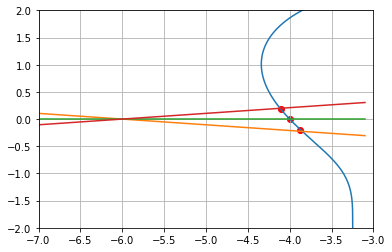

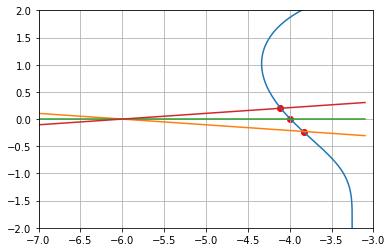

In [310]:
x_min,x_max,x_step = -10,-3,0.1
x_sweep = np.arange(x_min,x_max,x_step)

#plt.xlim(x_min,x_max)
#plt.ylim(x_min,x_max)
plt.xlim(-7,-3)
plt.ylim(-2,2)

plt.figure(1)
thetas = np.arange(0,1,0.001)
[x_r,y_r] = scan_obj.get(thetas)
plt.plot(x_r,y_r)
x_int = [];
scan_obj.rotate(0)
for line in scanner.lines:
    plt.grid();
    [x,y] = line.get(x_sweep);
    plt.plot(x,y)
    print("Angle =",line.angle*180/np.pi,"\tSlope =", np.tan(line.angle))
    
    closest_point = [-1,-1];
    d = 10;
    for point in range(0,len(x_sweep)):
        for angle in range(0,len(thetas)):
            td = np.sqrt((x_sweep[point]-x_r[angle])**2+(y[point]-y_r[angle])**2)
            if(td<d):
                d = td
                closest_point = [x_r[angle],y_r[angle]];
    x_int.append(closest_point)
for i in range(0,len(scanner.lines)):
    plt.scatter(x_int[i][0],x_int[i][1],c='r')
print(x_int)
plt.figure(2)
plt.xlim(-7,-3)
plt.ylim(-2,2)
scan_obj.rotate(1)
thetas = np.arange(0,1,0.001)
[x_r,y_r] = scan_obj.get(thetas)
plt.plot(x_r,y_r)
x_int = [];
for line in scanner.lines:
    plt.grid();
    [x,y] = line.get(x_sweep);
    plt.plot(x,y)
    print("Angle =",line.angle*180/np.pi,"\tSlope =", np.tan(line.angle))
    
    closest_point = [-1,-1];
    d = 10;
    for point in range(0,len(x_sweep)):
        for angle in range(0,len(thetas)):
            td = np.sqrt((x_sweep[point]-x_r[angle])**2+(y[point]-y_r[angle])**2)
            if(td<d):
                d = td
                closest_point = [x_r[angle],y_r[angle]];
    x_int.append(closest_point)
for i in range(0,len(scanner.lines)):
    plt.scatter(x_int[i][0],x_int[i][1],c='r')
print(x_int)

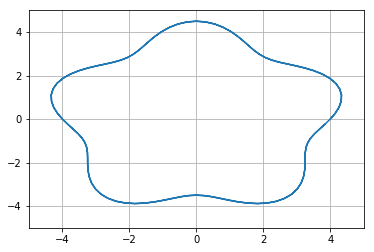

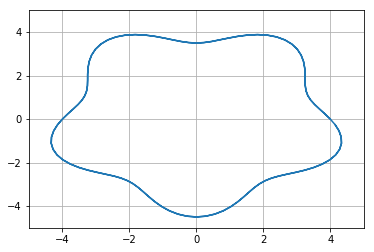

In [308]:
plt.figure(1)
plt.grid()
plt.xlim(-5,5)
plt.ylim(-5,5)
scan_obj.rotate(0)
thetas = np.arange(0,2,0.01)
[x_r,y_r] = scan_obj.get(thetas)
plt.plot(x_r,y_r)
plt.figure(2)
plt.grid()
plt.xlim(-5,5)
plt.ylim(-5,5)
scan_obj.rotate(180)
thetas = np.arange(0,2,0.01)
[x_r,y_r] = scan_obj.get(thetas)
plt.plot(x_r,y_r)